In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df_train = pd.read_csv('Google_Stock_Price_train.csv')
training_set = df_train.iloc[:,1:2].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)
x_train=[]
y_train=[]
for i in range(60,len(training_set_scaled)):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train = np.reshape(x_train,newshape=(x_train.shape[0],x_train.shape[1],1))

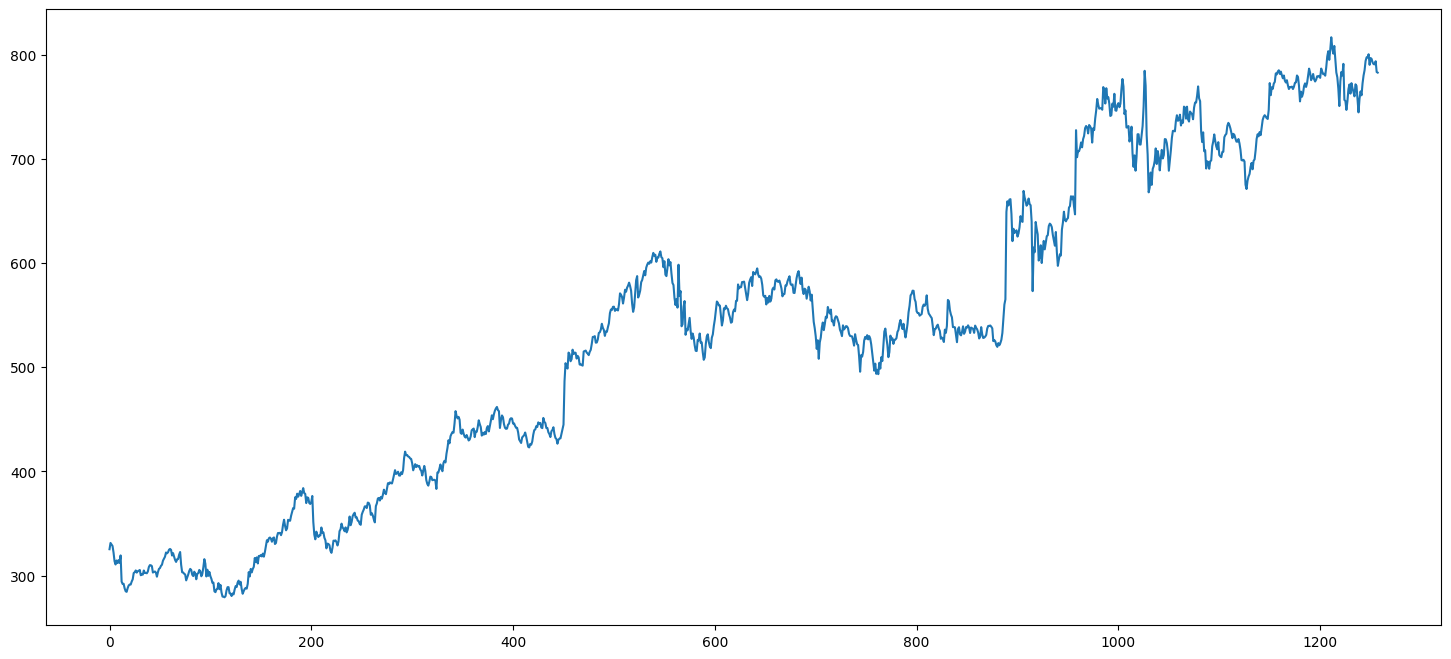

In [21]:
plt.figure(figsize=(18,8))
plt.plot(df_train['Open'])

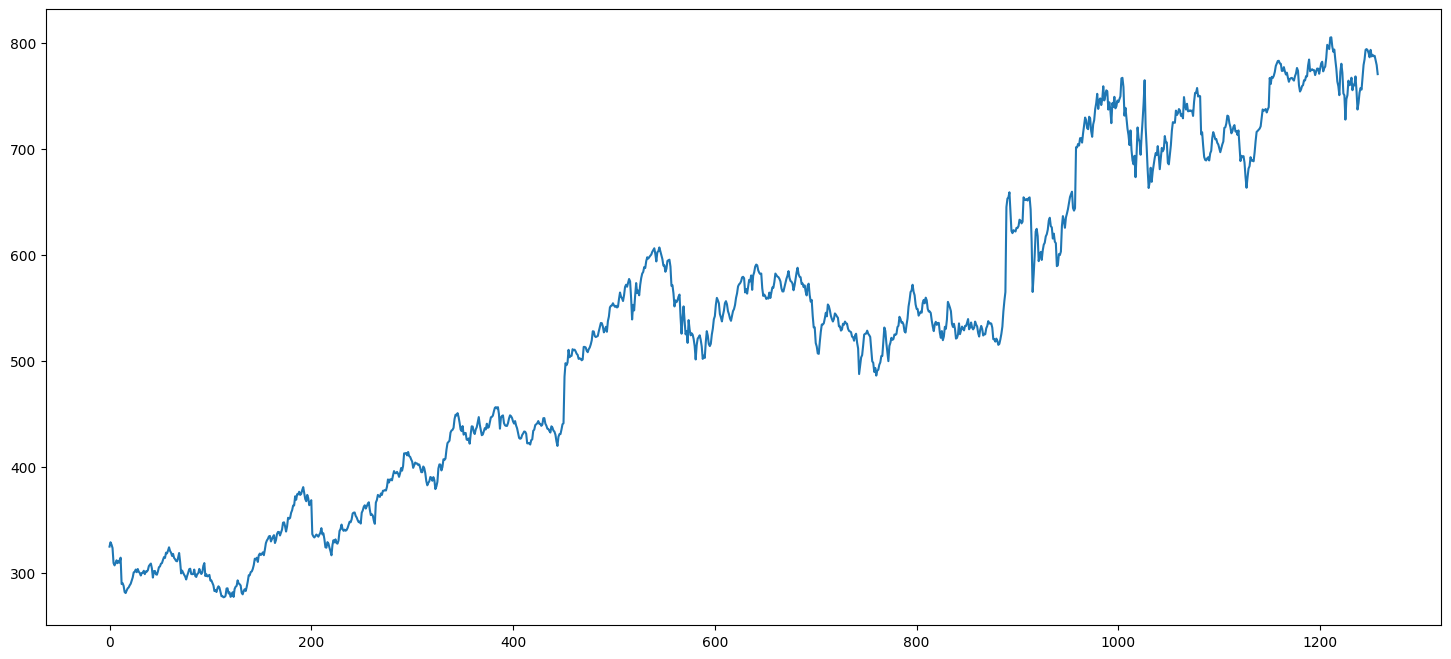

In [22]:
plt.figure(figsize=(18,8))
plt.plot(df_train['Low'])

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(LSTM(50,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(Dropout(rate=0.2))

model.add(LSTM(50,return_sequences=True))
model.add(Dropout(rate=0.2))

model.add(LSTM(50,return_sequences=True))
model.add(Dropout(rate=0.2))

model.add(LSTM(50,return_sequences=False))
model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')
model.summary
model.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
38/38 [==============================] - 10s 74ms/step - loss: 0.0512
Epoch 2/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0048
Epoch 5/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0044
Epoch 6/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0038
Epoch 11/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0042
Epoch 13/100
38/38 [==

38/38 [==============================] - 3s 76ms/step - loss: 0.0013


In [29]:
df_test = pd.read_csv("Google_Stock_Price_test.csv")
testing_set = df_test.iloc[:,1:2].values
df_total = pd.concat((df_train['Open'],df_test['Open']),axis=0)
inputs = df_total[len(df_total)-len(df_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test=[]
for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,newshape=(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(20, 60, 1)

In [31]:
real_stock_price = testing_set
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 47ms/step


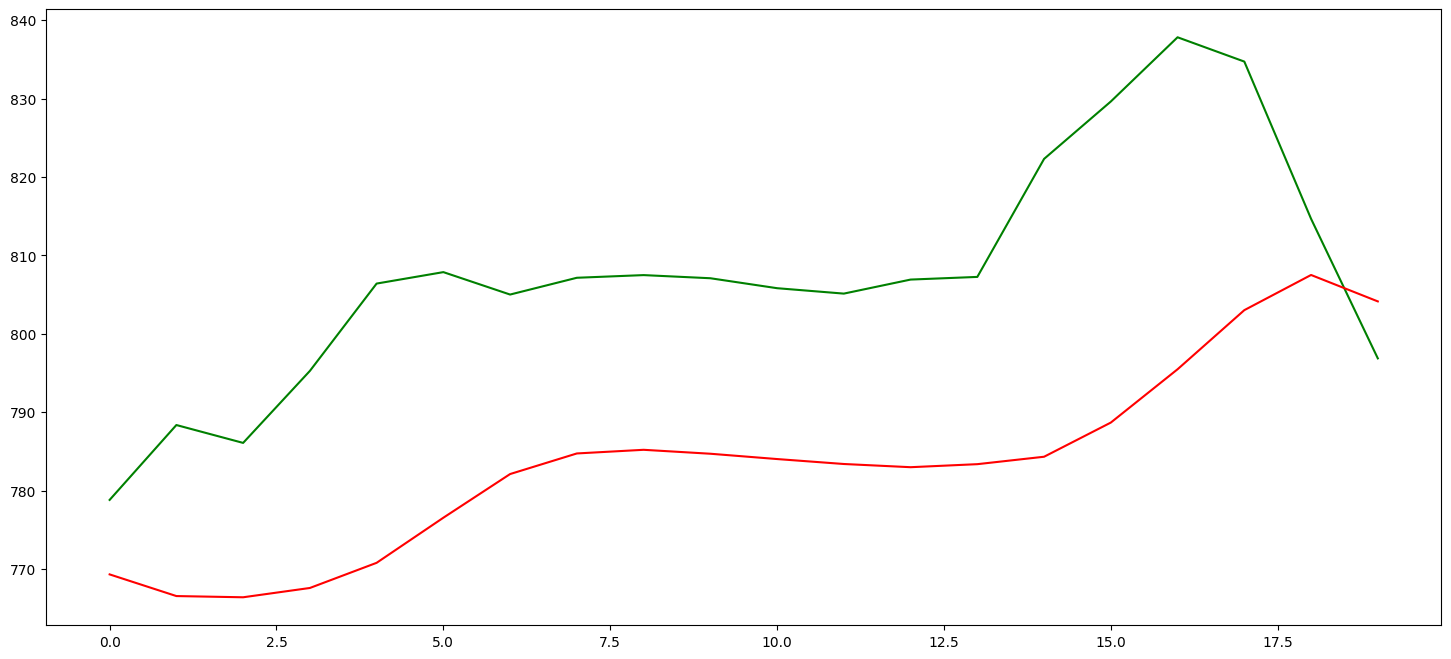

In [34]:
plt.figure(figsize=(18,8))
plt.plot(real_stock_price,color='green')
plt.plot(predicted_stock_price,color='red')